## Practicing Neural Networks with the fashion MNIST dataset
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [7]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def imageLabel(index):
    plt.imshow(np.array(train_images[index]))
    plt.show()
    print(class_names[train_labels[index]])

In [30]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
n = 0
index_list = []
label_list = []
for label in train_labels[0:1000]:
    if label not in label_list:
        index_list.append(n)
        n += 1
    else:
        n += 1
    label_list.append(label)
    

Value average: 97.25382653061224
Ankle boot


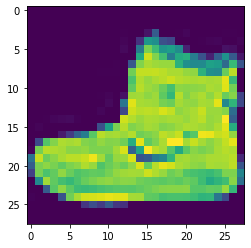

Value average: 107.90561224489795
T-shirt/top


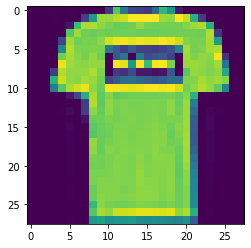

Value average: 59.50127551020408
Dress


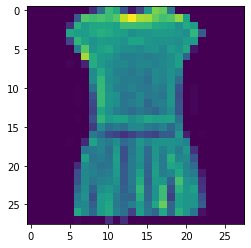

Value average: 107.35331632653062
Pullover


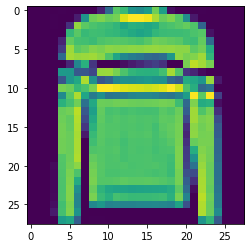

Value average: 41.48724489795919
Sneaker


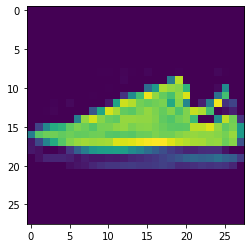

Value average: 25.372448979591837
Sandal


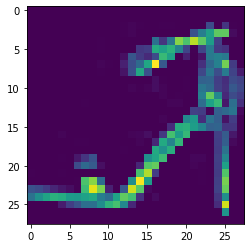

Value average: 66.47704081632654
Trouser


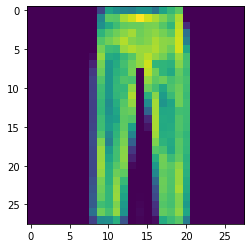

Value average: 112.25127551020408
Shirt


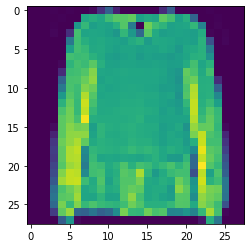

Value average: 40.55484693877551
Coat


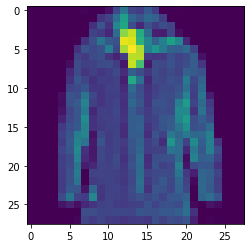

Value average: 99.71811224489795
Bag


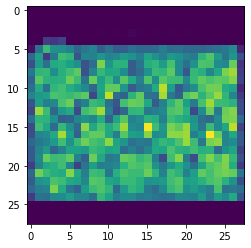

In [52]:
for index in index_list:
    print(f'Value average: {np.average(train_images[index])}')
    imageLabel(index)
    plt.pause(0.05)

In [56]:
train_images.shape

(60000, 28, 28)

In [93]:
test_images.shape

(10000, 28, 28)

In [95]:
train_images_shaped = train_images.reshape(60000, 28*28)
test_images_shaped = test_images.reshape(10000, 28*28)
# train_images_shaped = [image.reshape(1,28*28) for image in train_images]

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_images_scaled = scaler.fit_transform(train_images_shaped)
test_images_scaled = scaler.transform(test_images_shaped)
# train_images_scaled = [scaler.fit_transform(image) for image in train_images_shaped]

In [85]:
train_labels.reshape(-1,1)

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [115]:
from sklearn.preprocessing import OneHotEncoder
# one hot the labels

encoder = OneHotEncoder(sparse=False)
train_encoded = encoder.fit_transform(train_labels.reshape(-1,1))
test_encoded = encoder.transform(test_labels.reshape(-1,1))

In [92]:
train_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We're predicting the probability of a class, to do so we should have values between 0 and 1

----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [83]:
from tensorflow.keras.models import Sequential        # Helper to build a network from a sequence of layers
from tensorflow.keras.layers import Dense             # Fully-connected layer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import  train_test_split 

In [99]:
test_encoded.shape

(10000, 10)

In [102]:
train_encoded.shape

(60000, 10)

In [101]:
len(class_names)

10

In [116]:
# Create the model (num_features -> 728 -> 728 -> 10)
model = Sequential()
model.add(Dense(728, activation='relu', input_shape=(train_images_scaled.shape[1],)))
model.add(Dense(728, activation='relu'))
model.add(Dense(728, activation='relu'))
model.add(Dense(10))

# Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')    # Builds the static computation graph
model.fit(train_images_scaled, train_encoded, validation_data=(test_images_scaled, test_encoded), epochs=30, batch_size=2000, 
          callbacks=[EarlyStopping(patience=5)], verbose=1)

Epoch 1/30
30/30 [==============================] - 4s 119ms/step - loss: 4.8230 - accuracy: 0.0162 - val_loss: 6.0249 - val_accuracy: 0.1000
Epoch 2/30
30/30 [==============================] - 4s 120ms/step - loss: 7.5391 - accuracy: 0.1000 - val_loss: 11.3541 - val_accuracy: 0.1000
Epoch 3/30
30/30 [==============================] - 3s 113ms/step - loss: 11.2902 - accuracy: 0.1000 - val_loss: 11.2827 - val_accuracy: 0.1000
Epoch 4/30
30/30 [==============================] - 3s 112ms/step - loss: 7.2738 - accuracy: 0.1000 - val_loss: 4.8354 - val_accuracy: 0.1000
Epoch 5/30
30/30 [==============================] - 3s 114ms/step - loss: 4.8354 - accuracy: 0.1000 - val_loss: 4.8354 - val_accuracy: 0.1000
Epoch 6/30
30/30 [==============================] - 4s 128ms/step - loss: 4.8354 - accuracy: 0.1000 - val_loss: 4.8354 - val_accuracy: 0.1000
Epoch 7/30
30/30 [==============================] - 3s 97ms/step - loss: 4.8354 - accuracy: 0.1000 - val_loss: 4.8354 - val_accuracy: 0.1000
Epoc

In [113]:
model.evaluate(test_images_scaled, test_encoded, batch_size=2000, )

5/5 [==============================] - 0s 27ms/step - loss: 4.8354


4.83543062210083

In [ ]:
# model.predict

